# &#x1F4DD; REPORT

# Homework &#x0031;&#xFE0F;&#x20E3; 

Homework policy: the homework is individual. Students are encouraged to discuss with fellow students to try to find the main structure of the solution for a problem, especially if they are totally stuck at the beginning of the problem. However, you should work out the details yourself and write down in your own words only what you understand yourself.


In this problem, we consider the roundtrip delay in a computer network (internet) between the computer we’re working on and another computer connected to the network. This roundtrip delay will be different, every time we send a message. As such, it can be modeled as a random variable y. For the design of network protocols and for their performance evaluation, it is important to know the distribution of this random roundtrip delay. To turn the estimation of the roundtrip delay distribution into a parameter estimation problem, we shall take a parametric distribution, parameterized by one or more parameters. Since we don’t have too much information about this variable y (except that it should be positive), we shall try several parametric distributions. In particular, we shall consider the following distributions:

$$
\text { * A Gaussian distribution: } \qquad f_G (y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}  e^{-\frac{(y−\mu)^2}{2\sigma^2}} 
$$

$$
\text { * A Rayleigh distribution: } \qquad f_R (y|\sigma^2) = 
\begin{cases}
0 & , y < 0
\\
\frac{y}{\sigma^2}  e^{-\frac{y^2}{2\sigma^2}} & , y \geq 0
\end{cases}
$$

$$
\text { * An Erlang distribution: } \qquad f_{Em} (y|\lambda) = 
\begin{cases}
0 & , y < 0
\\
\frac{\lambda^{m+1}}{m!} y^me^{\lambda y} & , y \geq 0
\end{cases} 
\\
\text{ for different values of } m \in \{0,1,2\}.
\\
\\
\text{ Remark that for m = 0 we have an exponential density: }
\\
f_{E0}(y|\lambda) = 
\begin{cases}
0 & , y < 0
\\
\lambda e^{-\lambda y} & , y \geq 0
\end{cases}
$$

$$
\text{ * A (shifted) exponential density: } \qquad f_{exp}(y|\lambda,\alpha) = 
\begin{cases}
0 & , y < 0
\\
\lambda e^{-\lambda(y - \alpha)} & , y \geq 0
\end{cases}
$$

**&#x1F516;** **(&#x2170;)** Your raw data?


In [1]:
using DataFrames, CSV

In [2]:
df = CSV.File("stats.txt") |> DataFrame;

In [3]:
using PrettyTables

In [4]:
header = (
      ["pingstats"]
    , ["[Float64]"]
);

In [5]:
y = df[!,"pingstats"]; @show y[1:3];

y[1:3] = [158.991, 152.726, 152.736]


In [6]:
pretty_table(
    first(y, 3)
    , backend=Val(:html), header = header, standalone=true)

pingstats
[Float64]
158.991
152.726
152.736


In [7]:
using Statistics
using StatsPlots

In [8]:
# Global Operations and constants
∑ = sum
𝖤 = mean # Expected Value
n = length(y) # Lenght of data used all along

100

In [9]:
using Markdown

**&#x1F516;** **(&#x2170;&#x2170;)** Estimated Parameters

#### &#x1F4DD; Gaussian Distribution

Given the probability density function (PDF) of a Gaussian (normal) distribution

$ f_G(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y-\mu)^2}{2\sigma^2}} $

and a dataset $Y = \{y_1, y_2, \ldots, y_n\}$, we want to find the Maximum Likelihood Estimators (MLEs) for the parameters $\mu$ (mean) and $\sigma^2$ (variance).

### Finding $\mu$ and $\sigma^2$

The MLEs for $\mu$ and $\sigma^2$ are found by maximizing the log-likelihood function derived from the given PDF.

#### Log-Likelihood Function

The log-likelihood function for the Gaussian distribution, given $n$ data points, is:

$ L(\mu, \sigma^2 | Y) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y - \mu)^2 $

#### Maximizing the Log-Likelihood

To find the MLEs, we take the partial derivatives of $L(\mu, \sigma^2 | Y)$ with respect to $\mu$ and $\sigma^2$, set them to zero, and solve for $\mu$ and $\sigma^2$.

1. **For $\mu$:**

$ \frac{\partial L}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (y - \mu) = 0 $

Solving this for $\mu$ gives:

$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} y $

This is the sample mean of the data.

2. **For $\sigma^2$:**

$ \frac{\partial L}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (y - \mu)^2 = 0 $

Solving for $\sigma^2$ gives:

$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{\mu})^2 $

This is the sample variance of the data.

### Summary

- The MLE of $\mu$ ($\hat{\mu}$) is the sample mean.
- The MLE of $\sigma^2$ ($\hat{\sigma}^2$) is the sample variance (without Bessel's correction).

&#x1F518; $\mu_G$=? ($\mu_G$)

In [10]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Gaussian Mean
```math
\hat{\mu}_G = \frac{1}{n} \sum_{i=1}^{n} y \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Estimated Gaussian Mean

$$
\hat{\mu}_G = \frac{1}{n} \sum_{i=1}^{n} y \qquad \{i: \in 1,\cdots,n\}
$$


In [11]:
# Compute the mean by dividing the total sum by the number of data points
μ̂𝐺 = 1/n * ∑([i for i in y])

# Print the calculated mean
println("The estimated mean μ̂ of the dataset is: ", round(μ̂𝐺))

The estimated mean μ̂ of the dataset is: 180.0


&#x1F518; $\sigma_G$=? ($\sigma_G^2$)

In [12]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Gaussian Variance
```math
\hat{\sigma}_G^2 = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{\mu}_G)^2 \qquad \{i: \in 1,\cdots,n\}
```
with Bessel's correction replace $\frac{1}{n}$ by $\frac{1}{n - 1}$
")

#### &#x1F4DD; Estimated Gaussian Variance

$$
\hat{\sigma}_G^2 = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{\mu}_G)^2 \qquad \{i: \in 1,\cdots,n\}
$$

with Bessel's correction replace $\frac{1}{n}$ by $\frac{1}{n - 1}$


In [13]:
# Calculate the variance (this is σ_G^2)
σ̂𝐺² = 1/n * ∑([(i - μ̂𝐺)^2 for i in y]) # or σ̂𝐺² = var(y, corrected=false) if using Statistics package

# Print the calculated variance
println("The calculated variance σ𝐺² of the dataset is: ", round(σ̂𝐺²))

The calculated variance σ𝐺² of the dataset is: 576.0


In [14]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Gaussian Standard Deviation
```math
\hat{\sigma}_G = \sqrt{\hat{\sigma}_G^2}
```
")

#### &#x1F4DD; Estimated Gaussian Standard Deviation

$$
\hat{\sigma}_G = \sqrt{\hat{\sigma}_G^2}
$$


In [15]:
# Calculate the standard deviation (\hat{\sigma}_G)
σ̂𝐺 = √(σ̂𝐺²)

println("calculated standard deviation σ̂𝐺 = ", round(σ̂𝐺))

calculated standard deviation σ̂𝐺 = 24.0


In [16]:
Markdown.parse(raw"
#### &#x1F4DD; Gaussian Log-Likelihood
```math
\mathcal{L}_G(\mu_G, \sigma_G^2) = -\frac{n}{2} \log(2\pi\sigma_G^2) - \frac{1}{2\sigma_G^2} \sum_{i=1}^{n} (y - \mu_G)^2
```
")

#### &#x1F4DD; Gaussian Log-Likelihood

$$
\mathcal{L}_G(\mu_G, \sigma_G^2) = -\frac{n}{2} \log(2\pi\sigma_G^2) - \frac{1}{2\sigma_G^2} \sum_{i=1}^{n} (y - \mu_G)^2
$$


In [17]:
# Compute the log-likelihood 𝓛G 
𝓛𝐺 = -n/2 * log(2π * σ̂𝐺²) - 1/(2*σ̂𝐺²) * ∑((y .- μ̂𝐺).^2) # typed \bscrL

println("Log-likelihood 𝓛𝐺: ", round(𝓛𝐺))

Log-likelihood 𝓛𝐺: -460.0


#### &#x1F4CA; Plot

In [18]:
using Distributions

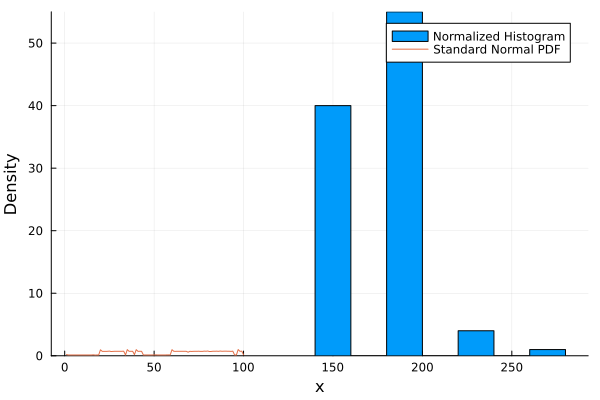

In [19]:
# Create a normalized histogram
histogram(y
    # , normalization=:probability
    , label="Normalized Histogram"
)

# To compare with a PDF, overlay the PDF on the same plot
# For example, overlaying a standard normal PDF
# plot!(Normal(0, 1), fill=(0, .5,:orange), label="Standard Normal PDF")

dist = Normal(μ̂𝐺, σ̂𝐺)

# Define a range of values over which to plot the PDF
x = 0:10:n  # Adjust the range and step as needed

# Calculate the PDF for each y value
pdf_values = cdf.(dist, y)

# Plot the PDF
plot!(pdf_values, label="Standard Normal PDF", xlabel="x", ylabel="Density")

---

#### &#x1F4DD; Rayleigh Distribution

Given the probability density function (PDF) of a Rayleigh distribution

$ f(y|\sigma^2) = \frac{y}{\sigma^2} e^{-\frac{y^2}{2\sigma^2}}, \quad y \geq 0 $

and a dataset $Y = \{y_1, y_2, ..., y_n\}$, to find the scale parameter $\sigma^2$, we use the method of Maximum Likelihood Estimation (MLE).

Step 1: Log-Likelihood Function

The first step is to write down the log-likelihood function based on the given PDF. For the Rayleigh distribution, the log-likelihood function $L_R(\sigma^2)$ for the dataset is:

$ L_R(\sigma^2) = \sum_{i=1}^{n} \ln\left(\frac{y}{\sigma^2}\right) - \frac{y^2}{2\sigma^2} $

Simplifying, we get:

$ L_R(\sigma^2) = \sum_{i=1}^{n} \ln(y) - n \ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n} y^2 $

Step 2: Differentiate and Solve for $\sigma^2$

To find the MLE of $\sigma^2$, differentiate $L_R(\sigma^2)$ with respect to $\sigma^2$ and set the derivative to zero:

$ \frac{dL_R}{d\sigma^2} = -\frac{n}{\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^{n} y^2 = 0 $

Solving for $\sigma^2$, we find:

$ \hat{\sigma}^2 = \frac{1}{2n}\sum_{i=1}^{n} y^2 $

### Conclusion

The MLE for the scale parameter $\sigma^2$ of a Rayleigh distribution, given a set of observations $Y$, is the sum of the squared observations divided by twice the number of observations. This result directly provides the estimate of $\sigma^2$ from the data.

&#x1F518; $\sigma_R$=? ($\sigma_R^2$)

In [20]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Rayleigh Variance
```math
\hat{\sigma}_R^2 = \frac{1}{2n} \sum_{i=1}^n y^2  \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Estimated Rayleigh Variance

$$
\hat{\sigma}_R^2 = \frac{1}{2n} \sum_{i=1}^n y^2  \qquad \{i: \in 1,\cdots,n\}
$$


In [21]:
# Estimate sigma^2 (sigma squared) for Rayleigh distribution
σ̂𝑅² = 1/2n * ∑([i^2 for i in y]) # or ∑(y .^ 2) when squaring element-wise 

# Display the estimated parameter
println("Estimated parameter σ̂𝑅² = ", round(σ̂𝑅²));

Estimated parameter σ̂𝑅² = 16435.0


In [22]:
# Calculate the standard deviation (σ_R)
σ̂𝑅 = √(σ̂𝑅²)

println("calculated standard deviation σ̂𝑅 = ", round(σ̂𝑅))

calculated standard deviation σ̂𝑅 = 128.0


In [23]:
Markdown.parse(raw"
#### &#x1F4DD; Rayleigh Log-Likelihood
```math
L_R(\sigma|Y) = \sum_{i=1}^{n} \ln(y) - n\ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} y^2
```
")


#### &#x1F4DD; Rayleigh Log-Likelihood

$$
L_R(\sigma|Y) = \sum_{i=1}^{n} \ln(y) - n\ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} y^2
$$


In [24]:
𝓛𝑅 = ∑(log.(y)) - n * log(σ̂𝑅²) - 1 / (2 * σ̂𝑅²) * ∑(y .^ 2) 
println("Log-likelihood 𝓛𝑅: ", round(𝓛𝑅))

Log-likelihood 𝓛𝑅: -552.0


---

&#x1F518; $\lambda_{E0}$=? ($\lambda_{E0}$)

&#x1F518; $\lambda_{E1}$=? ($\lambda_{E1}$)

#### &#x1F4DD; Erlang distribution where $m = 1$

When $m = 1$, the Erlang distribution simplifies to the exponential distribution because the Erlang distribution is a general case of the gamma distribution for integer shape parameters, and the exponential distribution is a special case of the gamma distribution with a shape parameter of 1. The probability density function (PDF) for an exponential distribution with rate $\lambda$ is given by:

$ f(y|\lambda) = \lambda e^{-\lambda y}, \quad y \geq 0 $

To find the rate parameter $\lambda$ given a set of data $Y = \{y_1, y_2, ..., y_n\}$ from this distribution, you use the method of Maximum Likelihood Estimation (MLE).

* Step 1: Write the Likelihood Function

The likelihood function for the exponential distribution, given the dataset $Y$, is:

$ L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda y} = \lambda^n e^{-\lambda \sum_{i=1}^{n} y} $

* Step 2: Log-Likelihood Function

Taking the natural logarithm of the likelihood function gives the log-likelihood function:

$ \ln L(\lambda) = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y $

* Step 3: Find the MLE of $\lambda$

Differentiate the log-likelihood function with respect to $\lambda$ and set it equal to zero to solve for $\lambda$:

$ \frac{d}{d\lambda} \ln L(\lambda) = \frac{n}{\lambda} - \sum_{i=1}^{n} y = 0 $

Solving for $\lambda$ gives:

$ \hat{\lambda} = \frac{n}{\sum_{i=1}^{n} y} $


In [25]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Lambda when m = 1
```math
\hat{\lambda}_{E1} = \frac{n}{\sum_{i=1}^{n} y}
```
")

#### &#x1F4DD; Estimated Lambda when m = 1

$$
\hat{\lambda}_{E1} = \frac{n}{\sum_{i=1}^{n} y}
$$


In [26]:
# Estimate λ for the erlang distribution when m = 1
λ̂𝐸1 = n / ∑([i for i in y])

println("Estimated rate parameter λ̂𝐸1 = ", round(λ̂𝐸1, digits = 3))

Estimated rate parameter λ̂𝐸1 = 0.006


In [27]:
Markdown.parse(raw"
#### &#x1F4DD; Erlang Log-Likelihood when m = 1
```math
\ln L(\lambda)_{E1} = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y
```
")


#### &#x1F4DD; Erlang Log-Likelihood when m = 1

$$
\ln L(\lambda)_{E1} = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y
$$


In [28]:
𝓛𝐸1 = n * log(λ̂𝐸1) - λ̂𝐸1 * ∑([i for i in y])
println("Log-likelihood 𝓛𝐸1: ", round(𝓛𝐸1))

Log-likelihood 𝓛𝐸1: -619.0


* Finding $\lambda$ when $m = 2$

To find the rate parameter $\lambda$ given a set of data $Y = \{y_1, y_2, ..., y_n\}$ from an Erlang distribution with $m=2$, you would again use the method of Maximum Likelihood Estimation (MLE), but the process involves the specific form of the PDF for $m=2$.

* Step 1: Likelihood Function

The likelihood function for the dataset is the product of the PDF values for each observation:

$ L(\lambda) = \prod_{i=1}^{n} \frac{\lambda^2 y e^{-\lambda y}}{1!} $

* Step 2: Log-Likelihood Function

Taking the natural logarithm of the likelihood function gives the log-likelihood function:

$ \ln L(\lambda) = \sum_{i=1}^{n} \ln(\lambda^2 y_i e^{-\lambda y}) = 2n \ln(\lambda) + \sum_{i=1}^{n} \ln(y) - \lambda \sum_{i=1}^{n} y $

* Step 3: Differentiate and Solve for $\lambda$

$ \frac{d}{d\lambda} \ln L(\lambda) = \frac{d}{d\lambda} \left( 2n \ln(\lambda) - \lambda \sum_{i=1}^{n} y \right) $

$ = 2n \frac{1}{\lambda} - \sum_{i=1}^{n} y $

* Solve for $\lambda$

Setting the derivative equal to zero to find the critical points:

$ 2n \frac{1}{\lambda} - \sum_{i=1}^{n} y = 0 $

$ \Rightarrow 2n = \lambda \sum_{i=1}^{n} y $

$ \Rightarrow \lambda = \frac{2n}{\sum_{i=1}^{n} y} $

Thus, the MLE of $\lambda$ for the given Erlang distribution when $m=2$ is:

$ \hat{\lambda} = \frac{2n}{\sum_{i=1}^{n} y} $

This expression provides the estimate of $\lambda$ based on the dataset. It effectively doubles the reciprocal of the mean of the observations, which aligns with the intuition that for $m=2$, the rate $\lambda$ is estimated considering the process involves the sum of two exponential distributions (or equivalently, two "events" in the context of the Erlang distribution).

In [29]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Lambda when m = 2
```math
\hat{\lambda}_{E2} = \frac{2n}{\sum_{i=1}^{n} y}
```
")

#### &#x1F4DD; Estimated Lambda when m = 2

$$
\hat{\lambda}_{E2} = \frac{2n}{\sum_{i=1}^{n} y}
$$


In [30]:
# Estimate λ for the erlang distribution when m = 2
λ̂𝐸2 = 2n / ∑([i for i in y])

println("Estimated rate parameter λ̂𝐸2 = ", round(λ̂𝐸2, digits = 3))

Estimated rate parameter λ̂𝐸2 = 0.011


In [31]:
Markdown.parse(raw"
#### &#x1F4DD; Erlang Log-Likelihood when m = 2
```math
\ln L(\lambda)_{E2} = 2n \ln(\lambda) + \sum_{i=1}^{n} \ln(y) - \lambda \sum_{i=1}^{n} y
```
")


#### &#x1F4DD; Erlang Log-Likelihood when m = 2

$$
\ln L(\lambda)_{E2} = 2n \ln(\lambda) + \sum_{i=1}^{n} \ln(y) - \lambda \sum_{i=1}^{n} y
$$


In [32]:
𝓛𝐸2 = 2n * log(λ̂𝐸2) + ∑([log(i) for i in y]) - λ̂𝐸2 * ∑([i for i in y])
println("Log-likelihood 𝓛𝐸2: ", round(𝓛𝐸2))

Log-likelihood 𝓛𝐸2: -581.0


In [33]:
Markdown.parse(raw"
#### &#x1F4DD; Estimating $\lambda$ from data
```math
\hat{\lambda}_{E0} = \frac{1}{\bar{y}} = \frac{n}{\sum_{i=1}^{n} y}  \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Estimating $\lambda$ from data

$$
\hat{\lambda}_{E0} = \frac{1}{\bar{y}} = \frac{n}{\sum_{i=1}^{n} y}  \qquad \{i: \in 1,\cdots,n\}
$$


In [34]:
# Estimate λ for the exponential distribution
λ̂𝐸0 = n / ∑([i for i in y])

println("Estimated rate parameter λ̂𝐸0 = ", round(λ̂𝐸0, digits = 3))

Estimated rate parameter λ̂𝐸0 = 0.006


#### &#x1F4DD; Shifted Exponential Recap

The parameter $\lambda_{E0}$ typically refers to the rate parameter of an exponential distribution, especially within the context of statistical or probability distributions. The exponential distribution is often used to model the time between events in a Poisson point process, characterized by a constant average rate of occurrence.

The probability density function (PDF) of an exponential distribution is given by:

$ f(y|\lambda) = \lambda e^{-\lambda y} \quad \text{for} \quad y \geq 0 $

where:
- $y$ is the variable,
- $\lambda$ is the rate parameter of the distribution, which is positive ($\lambda > 0$).

### Estimating $\lambda$ from Data

If you have a dataset and you want to estimate the rate parameter $\lambda$ of the exponential distribution that best fits your data, you can use the Maximum Likelihood Estimation (MLE) method. Given a sample of $n$ independent observations from an exponential distribution, $y_1, y_2, \ldots, y_n$, the MLE of $\lambda$ is given by the reciprocal of the sample mean:

$ \hat{\lambda}_{E0} = \frac{1}{\bar{y}} = \frac{n}{\sum_{i=1}^{n} y_i} $

where $\bar{y}$ is the sample mean of the observations.





$\lambda_{E2}$=? ($\lambda_{E2}$)


$\lambda_{exp}$=? (shifted exponential distribution $\lambda_{exp}$)
$\alpha_{exp}$=? ($\alpha_{exp}$)


$\sigma_{SR}$=? (shifted Rayleigh $\sigma_{SR}^2$)
$\alpha_{SR}$=? ($\alpha_{SR}$)


plot
?


log-likelihood value
$L_G$ =?

$L_R$ =?

$L_{E0}$ =?

$L_{E1}$ =?

$L_{E2}$ =?

$L_{exp}$ =?

$L_{SR}$ =?

&#x1F516; **(&#x2173;)**  In Matlab, plot a histogram of the measurements {y1, . . . , yn} you made and in the same plot superimpose the graphs for the marginal densities $f (y|\hat{\theta}_{ML,i} (Y )), i \in \{G, R, E0, E1, E2, exp,SR \}$. Make this plot for y going from a value that is somewhat smaller than the $y_{min}$ you measured to a value that is somewhat bigger than the $y_{max}$ you measured. In Matlab, use the histogram command with the options ’Normalization’ and ’probability’, so that the histogram can be compared directly to the pdf of the distributions.

In [35]:
using Plots
using Distributions
using StatsPlots  # For the `plot` function for distributions

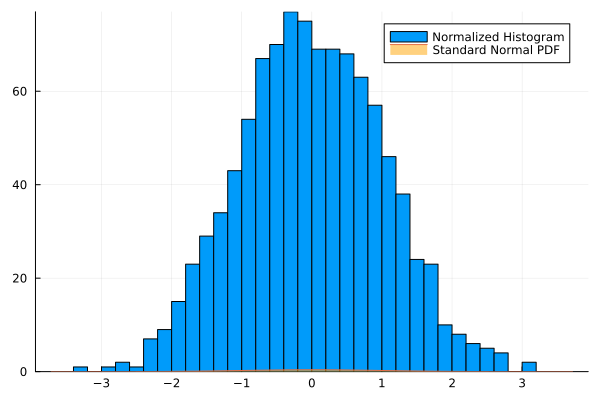

In [36]:
# Sample data: Replace `data` with your dataset
data = randn(1000)  # Example: 1000 random numbers from a standard normal distribution

# Create a normalized histogram
histogram(data, normalization=:probability, bins=30, label="Normalized Histogram")

# To compare with a PDF, overlay the PDF on the same plot
# For example, overlaying a standard normal PDF
plot!(Normal(0, 1), fill=(0, .5,:orange), label="Standard Normal PDF")